In [2]:
# Run this for the first time and relaunch jupyter.
!pip install rise

### <center> $ \color{maroon}{\text{Navigating the slides}}$ </center> 

* Use Space to go forward , and Shift + Space to go back (arroes below can be confusing)
* You can exit the presentation mode using the " X " on the top left corner
* You can re enter presentation mode using the graph like button on the top right (available after installing rise library and restarting jupyter)

### <center> $ \color{maroon}{\text{Linear Regression}}$ </center> 


*   Linear regression is a simple approach to supervised learning. It assumes that the dependence of $Y$ on  $X_1,X_2,...X_p$ is linear.
*   True regression functions are never linear!
<center> 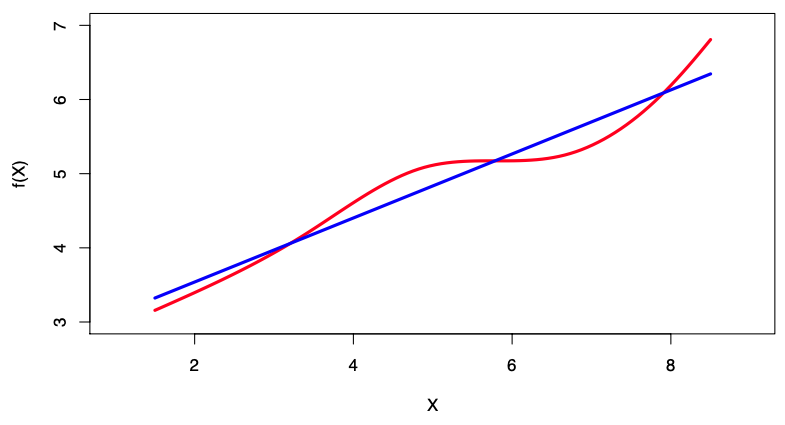 </center>

*   Although it may seem overly simplistic, linear regression is extremely useful both conceptually and practically.







### <center> $ \color{maroon}{\text{Linear Regression for the advertising data}}$ </center> 

Consider the advertising data shown on the next slide.

Questions we might ask:


*   Is there a relationship between advertising budget and sales?
*   How strong is the relationship between advertising budget and sales?
*   Which media contribute to sales?
*   How accurately can we predict future sales?
*   Is the relationship linear?
*   Is there synergy among the advertising media?



# <center> $\scriptsize \color{maroon}{\text{Advertising Data}}$  </center> 

<center> 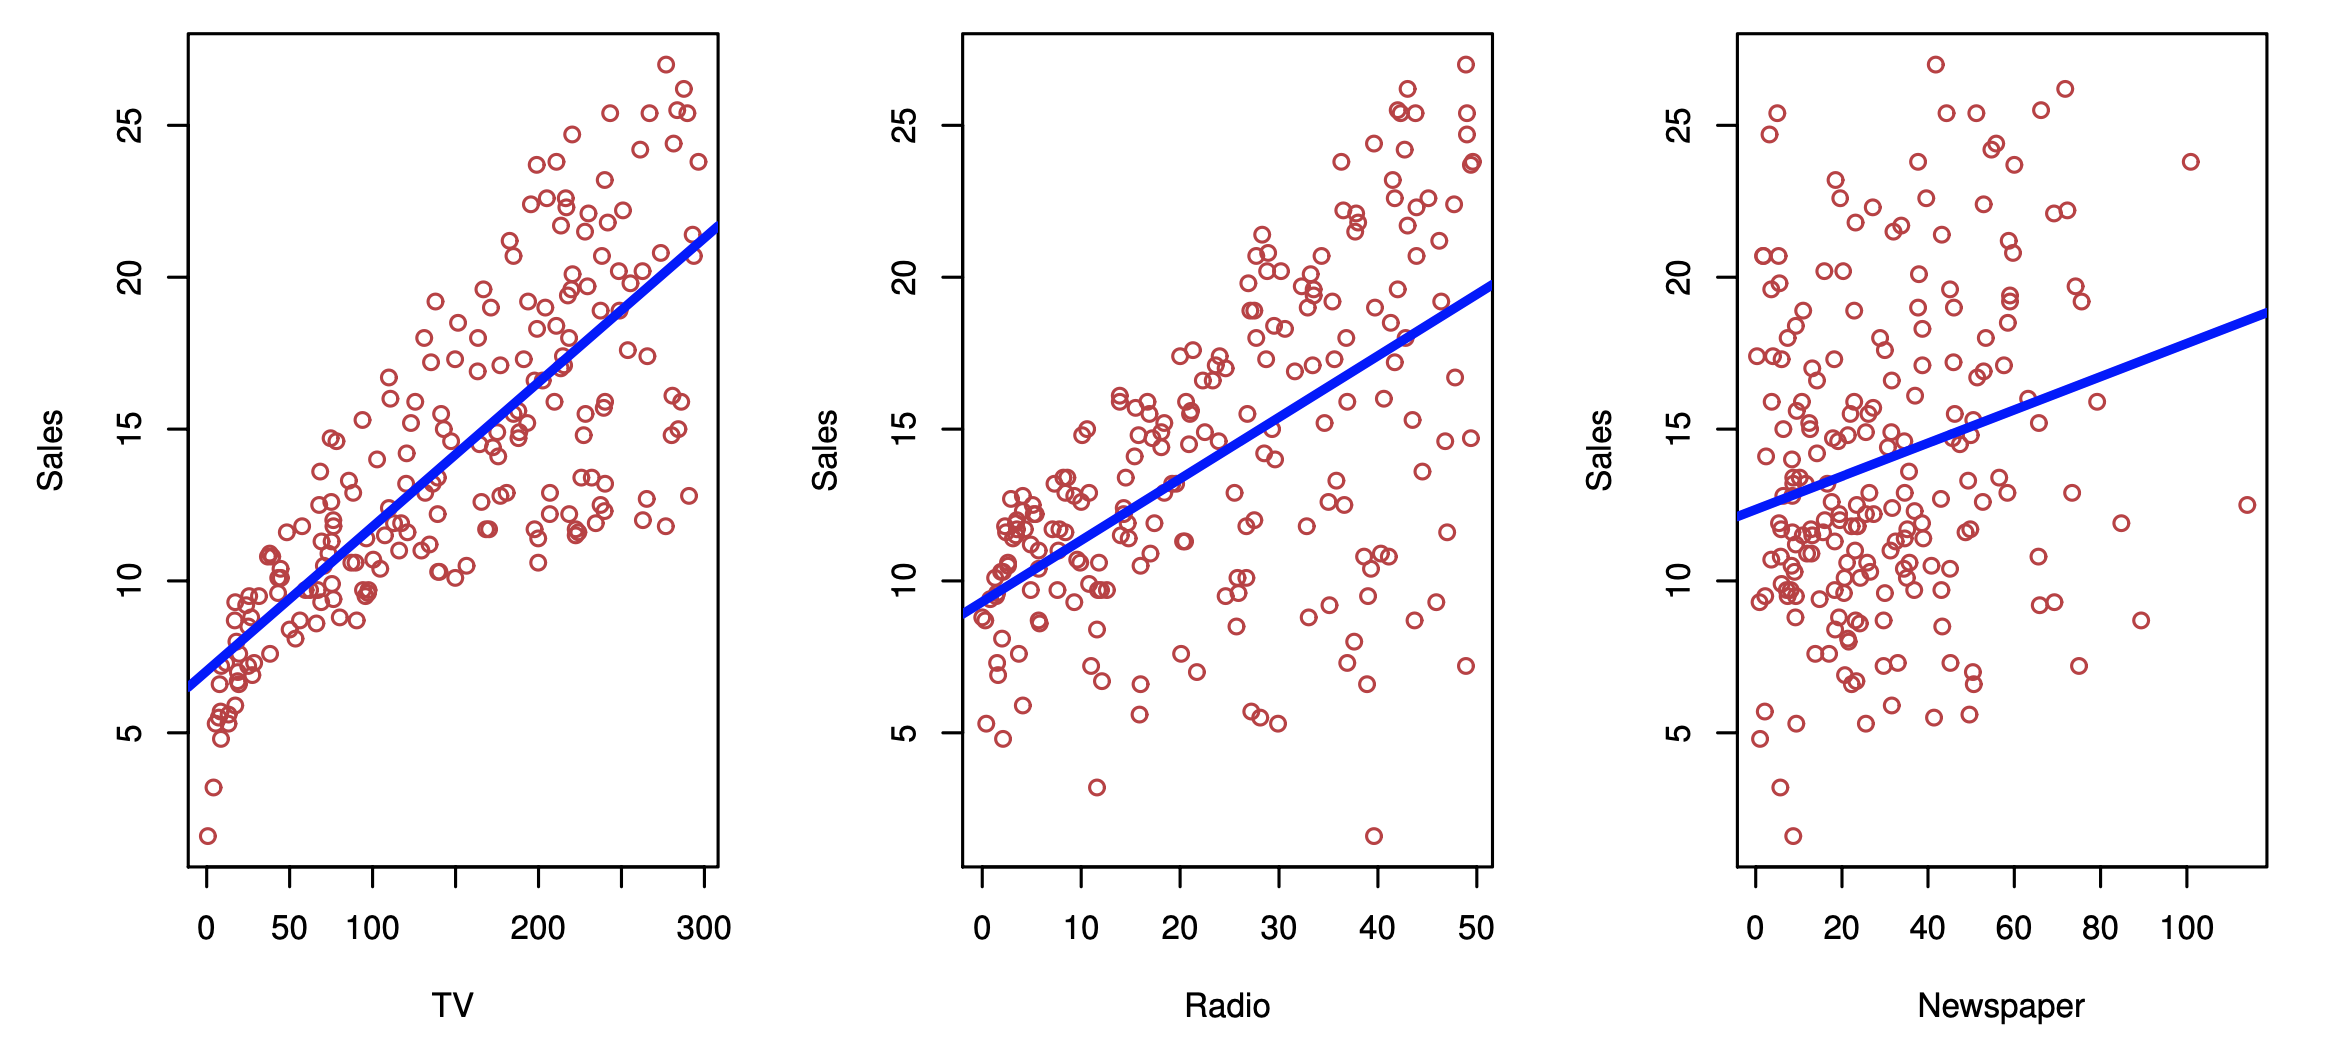 </center> 

### <center> $ \color{maroon}{\text{Simple linear regression using}}$ $ \color{maroon}{\text{a single predictor X}}$ </center> 

* We assume a model
$$ Y = \beta_0 + \beta_1 X + \epsilon $$
where $\beta_0$ and $\beta_1$ are two unknown constants that represent the  $\color{green}{\text{intercept}}$ and $\color{green}{\text{slope}}$, also known as  $\color{green}{\text{coefficients}}$  or $\color{green}{\text{parameters}}$ , and ε is the error term 

* Given some estimates $\hat{\beta_0}$ and $\hat{\beta_1}$ for the model coefficients, we predict future sales using
$$ \hat{y} = \hat{\beta_0} + \hat{\beta_1}x  $$
where $\hat{y}$ indicates a prediction of $Y$ on the basis of $X = x$. The $\color{green}{\text{hat}}$ symbol denotes an estimated value

### <center> $\color{maroon}{\text{Estimation of the parameters by least squares}}$ </center> 

* Let $\hat{y}_i = \hat{\beta_0} + \hat{\beta_1}x_i $ be the prediction for $Y$ based on the $i$th value of $X$. 

 Then $e_i = y_i - \hat{y_i}$ represents the $i$th $\color{green}{\text{residual}}$
 

* We define the $\color{green}{\text{residual sum of squares}}$ (RSS) as 
$$ RSS = e_1^2 + e_2^2 + \dots + e_n^2 $$
or equivalently as
\begin{align}
RSS = (\hat{y}_1 - \hat{\beta_0} - \hat{\beta_1}x_1)^2 &+ (\hat{y}_2 - \hat{\beta_0} - \hat{\beta_1}x_2)^2 + \\
                  & \dots + (\hat{y}_n - \hat{\beta_0} - \hat{\beta_1}x_n)^2 
\end{align}

* The least squares approach chooses $\hat{\beta_0}$ and $\hat{\beta_1}$ to minimize the $RSS$. 

 The minimizing values can be shown to be 
$$ \hat{\beta_1} = \frac{\sum_{i=1}^{n} (x_i - \bar{x}) (y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2} ,$$

$$ \hat{\beta_0} = \bar{y} - \hat{\beta_1} \bar{x} ,$$

 where $\bar{y} \equiv \frac{1}{n} \sum_{i=1}^{n} y_i $ and $\bar{x} \equiv \frac{1}{n} \sum_{i=1}^{n} x_i $ are the sample means.

### Let's get coding

* We will fit a simple linear regression model with a single predictor for the advertising data
* We first load some required libraries
(Run the cells by using shift + Enter)

In [1]:
# If you get a Module not found error uncomment the command for the module below 
# and re-run the cell
#!pip install numpy
#!pip install pandas
#!pip install scipy
#!pip install sklearn 
#!pip install seaborn

import numpy as np
import pandas as pd
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [15, 5]

#### Read the data and visualize it to see how the variables are related

In [2]:
advertising_df = pd.read_csv('Advertising.csv') 
# Enter the correct path ('path/Advertising.csv')
# or make sure the notebook is in the same location as the csv file

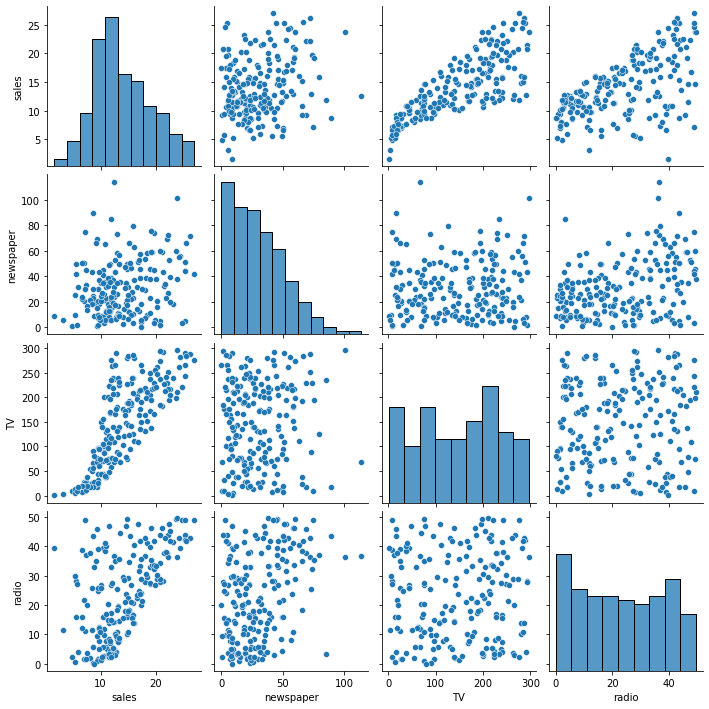

In [3]:
sns.pairplot(advertising_df,vars={'sales','TV','radio','newspaper'})

#### Extract values from the DataFrame into numpy arrays x and y

In [4]:
advertising_df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
x_radio = advertising_df.iloc[:,2:3].values # Loading the 'radio' column
y = advertising_df.iloc[:,4].values # Loading the 'sales' column
# get the TV (x_tv) and newspaper (x_news) columns



### Q2) Linear Regression

 Define the Model to be a linear regression model. 
 
 The intercept corresponds to having the constant term $\beta_0$

In [7]:
model_radio = LinearRegression(fit_intercept=True)
regression_radio = model_radio.fit(x_radio,y)
print('Regression coefficients for Radio are',regression_radio.coef_)
print('The Intercept beta_0 for Radio is',regression_radio.intercept_)

yfit_radio = regression_radio.predict(x_radio)
mse_radio = mean_squared_error(y,yfit_radio)
R2_radio = r2_score(y,yfit_radio)
print('Mean square error = ',mse_radio)
print('R squared = ',R2_radio)

Regression coefficients for Radio are [0.20249578]
The Intercept beta_0 for Radio is 9.311638095158283
Mean square error =  18.09239774512544
R squared =  0.33203245544529525


#### Perform Linear Regression with TV and newspaper

In [ ]:
# Your code here


#### Plotting the Fit

Text(0, 0.5, 'Sales')

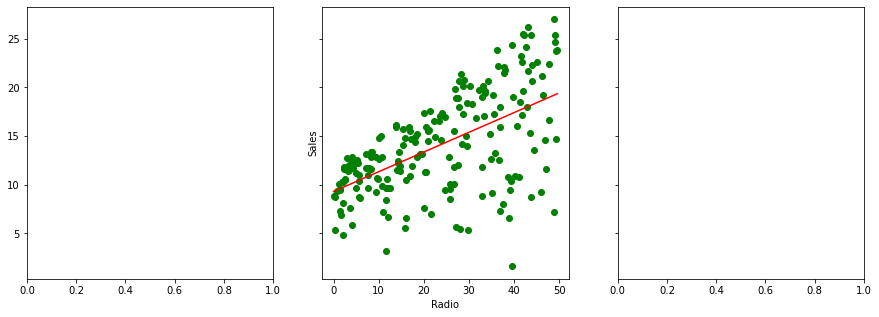

In [8]:
plt.rcParams['figure.figsize'] = [15, 5]
fig,ax = plt.subplots(1,3,sharey='row')

# Plot for TV data
# Your code here

# Plot for radio data
xax_radio = np.linspace(0,np.max(x_radio),100).reshape(-1,1)
yfit2_radio = regression_radio.predict(xax_radio)
ax[1].scatter(x_radio,y,color='green')
ax[1].plot(xax_radio,yfit2_radio,color='red')
ax[1].set_xlabel('Radio')
ax[1].set_ylabel('Sales')


# Plot for newspaper data
# Your code here


### <center> $\color{maroon}{\text{Example: advertising data}}$ </center> 

<center> 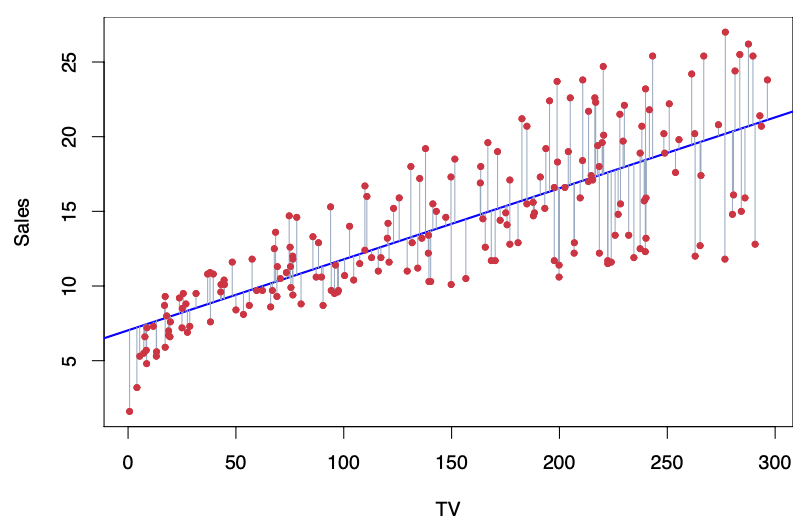 </center>

The least squares fit for the regression of $\color{maroon}{\text{sales}}$ onto $\color{maroon}{\text{TV}}$. 

In this case a linear fit captures the essence of the relationship, although it is somewhat deficient in the left of the plot.

### <center> $\color{maroon}{\text{Assessing the Accuracy of the Coefficient Estimates}}$ </center>



*   The standard error of an estimator reflects how it varies under repeated sampling. We have
$$ \text{SE}(\hat{\beta}_1)^2 = \frac{\sigma^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2}, \text{     SE}(\hat{\beta}_0)^2 = \sigma^2 \left[\frac{1}{n}+\frac{\bar{x}^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2}\right] $$

 where $\sigma^2 = \text{Var}(\epsilon)$

*   These standard errors can be used to compute  $\color{green}{\text{confidence intervals}}$.  A $95\%$ confidence interval is defined as a range of values such that with $95\%$ probability, the range will contain the true unknown value of the parameter. It has the form
$$\hat{\beta}_1 \pm 2\cdot \text{SE}(\hat{\beta}_1).$$




### <center> $\color{maroon}{\text{Confidence intervals — continued}}$ </center>

That is, there is approximately a $95\%$ chance that the interval

$$\left[ \hat{\beta_1} - 2\cdot \text{SE}(\hat{\beta_1}), \hat{\beta_1} + 2\cdot \text{SE}(\hat{\beta_1}) \right]$$

will contain the true value of $\beta_1$ (under a scenario where we got repeated samples like the present sample)

For the advertising data, the $95\%$ confidence interval for $\beta_1$ is $[0.042, 0.053]$

### <center> $\color{maroon}{\text{Hypothesis testing}}$ </center>


*   Standard errors can also be used to perform $\color{green}{\text{hypothesis tests}}$ on the coefficients. The most common hypothesis test involves testing the $\color{green}{\text{null hypothesis}}$ of

 $H_0 :$ &nbsp; &nbsp;  There is no relationship between X and Y versus the $\color{green}{\text{alternative hypothesis}}$

 $H_1 :$ &nbsp; &nbsp;  There is some relationship between X and Y.
*   Mathematically, this corresponds to testing 
<center> $H_0:\beta_1=0$ </center>
versus
<center> $H_A:\beta_1 \neq 0 ,$ </center>

 since if $\beta_1 = 0$ then the model reduces to $Y=\beta_0 +\epsilon$, and $X$ is not associated with $Y$.



### <center> $\color{maroon}{\text{Hypothesis testing — continued}}$ </center>


*   To test the null hypothesis, we compute a $\color{green}{\text{t-statistic}}$ , given by 
$$ t = \frac{ \hat{\beta}_1 - 0}{\text{SE}(\hat{\beta}_1)}$$

*   This will have a t-distribution with $n-2$ degrees of freedom, assuming $\beta_1=0$.

*   Using statistical software, it is easy to compute the probability of observing any value equal to $|t|$ or larger. We call this probability the $\color{green}{\text{p-value}}$.



### Q3 Compute the Standard Error, t-statistic and p-value for intercept and tv

* $$ \text{SE}(\hat{\beta}_1)^2 = \frac{\sigma^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2}, \text{     SE}(\hat{\beta}_0)^2 = \sigma^2 \left[\frac{1}{n}+\frac{\bar{x}^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2}\right] $$


* $$ t = \frac{ \hat{\beta}_1 - 0}{\text{SE}(\hat{\beta}_1)}$$

* p-value : the probability of observing any value equal to $|t|$ or larger

In [ ]:
# Your Code here



In [9]:
# Using data frames to better present data 

Variables = ['Intercept','TV']
Coeffs = [1,2]
Std_Error = [0.1,0.2]
Results_df = pd.DataFrame({'-': Variables,'Coefficient ':Coeffs,'Std.Error': Std_Error})
Results_df.set_index('-',inplace=True)
display(Results_df)

# Make changes above to display your results


,Coefficient,Std.Error
-,,
Intercept,1,0.1
TV,2,0.2


### Compare your results with the results from the textbook (next slide)

### <center> $\color{maroon}{\text{Results for the advertising data}}$ </center>


 $~$  | $$\textbf{Coefficient}$$ | $$\textbf{Std. Error}$$ | $$\textbf{t-statistic}$$ | $$\textbf{p-value}$$
----------|-------------|-----------|------------|----------
$$\color{maroon}{\text{Intercept}}$$ |$$7.0325$$| $$0.4578$$| $$ 15.36 $$| $$ < 0.0001$$
$$\color{maroon}{\text{TV}}$$ | $$0.0475$$   | $$0.0027$$    | $$17.67$$     | $$ < 0.0001 $$

$$~$$



### <center> $\color{maroon}{\text{Assessing the Overall Accuracy of the Model}}$ </center>


*   We compute the $\color{green}{\text{Residual Standard Error}}$ 
$$\text{RSE}= \sqrt{\frac{1}{n-2}\text{RSS}} = \sqrt{\frac{1}{n-2}\sum_{i=1}^{n}(y_i -\hat{y}_i)^2} ,$$
where the $\color{green}{\text{residual sum-of-squares}}$ is $\text{RSS}=\sum_{i=1}^{n}(y_i -\hat{y}_i)^2$. 
*    $\color{green}{\text{R-squared}}$ or fraction of variance explained is
$$\text{R}^2 = \frac{\text{TSS}-\text{RSS}}{\text{TSS}} = 1-\frac{\text{RSS}}{\text{TSS}}$$

 where $\text{TSS}=\sum_{i=1}^{n}(y_i -\bar{y})^2$ is the $\color{green}{\text{total sum of squares}}$ . 

*   It can be shown that in this simple linear regression setting that $\text{R}^2 = r^2$, where $r$ is the correlation between $X$ and $Y$ :
$$r = \frac{\sum_{i=1}^{n}(x_i -\bar{x})(y_i -\bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i -\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i -\bar{y})^2}}$$



#### Compute the RSE, $R^2$ for TV data


In [ ]:
# Your code here

### Compare your results with the results from the textbook (next slide)

### <center> $\color{maroon}{\text{Advertising data results}}$ 



| $$ \textbf{Quantity} $$                            | $$ \textbf{Value} $$|
| : ----------------------------------------------- :| : --------------- : | 
| $$\color{maroon}{\text{Residual Standard Error}}$$ | $$ 3.26 $$          |
| $$\color{maroon}{\text{R}^2}$$                     | $$ 0.612 $$         |
| $$\color{maroon}{\text{F-statistic}}$$             | $$ 312.1 $$         |





### <center> $\color{maroon}{\text{Multiple Linear Regression}}$ </center>


*   Here our model is
$$ Y = \beta_0 + \beta_1 X_1+ \beta_2 X_2 + \dots + + \beta_p X_p + \epsilon ,$$


*    We interpret $\beta_j$ as the $\color{green}{\text{average}}$ effect on $Y$ of a one unit increase in $X_j$, $\color{green}{\text{holding all other predictors fixed}}$. In the advertising example, the model becomes 
$$ \color{maroon}{\text{sales}} = \beta_0 + \beta_1 \times \color{maroon}{\text{TV}} + \beta_2 \times \color{maroon}{\text{radio}} + \beta_3 \times \color{maroon}{\text{newspaper}} + \epsilon.  $$




### <center> $\color{maroon}{\text{Interpreting regression coefficients}}$ </center>


*   The ideal scenario is when the predictors are uncorrelated 

 $-$ a $\color{green}{\text{balanced design}}$:

 * Each coefficient can be estimated and tested separately.
 * Interpretations such as $\color{green}{\text{“a unit   change in } X_j \text { is associated with a } β_j \text{ change in } Y,}$ $\color{green}{\text{ while all the other variables stay fixed”}}$, are possible.


*    Correlations amongst predictors cause problems :

  * The variance of all coefficients tends to increase, sometimes dramatically
  * Interpretations become hazardous — when $X_j$ changes,
everything else changes.

*   $\color{green}{\text{Claims of causality}}$ should be avoided for observational data.





### <center> $\color{maroon}{\text{The woes of (interpreting) regression coefficients}}$ </center>


$\color{green}{\text{“Data Analysis and Regression” Mosteller and Tukey 1977}}$

*    A regression coefficient $\beta_j$ estimates the expected change in $Y$ per unit change in $X_j$, $\color{green}{\text{with all other predictors held fixed}}$. But predictors usually change together!

* Example: $Y$ total amount of change in your pocket;
$X_1 = \# $ of coins; $X_2 = \#$ of pennies, nickels and dimes. By itself, regression coefficient of $Y$ on $X_2$ will be $> 0$. But how about with $X_1$ in model?

* $Y =$ number of tackles by a football player in a season; $W$ and $H$ are his weight and height. Fitted regression model is $\hat{Y} = b_0 + .50W − .10H$. How do we interpret $\hat{\beta}_2 < 0$ ?





### <center> $\color{maroon}{\text{Two quotes by famous Statisticians}}$ </center>


$\color{green}{\text{“ Essentially, all models are wrong, but some are useful"}}$

 $\text{ - George Box}$

$\color{green}{\text{“ The only way to find out what will happen when a complex system}}$ $\color{green}{\text{ is disturbed is to disturb the system, not merely to observe it passively "}}$

 $\text{ - Fred Mosteller and John Tukey, paraphrasing  George Box}$






### <center> $\color{maroon}{\text{Estimation and Prediction for Multiple Regression}}$ </center>



*    Given estimates $\hat{\beta}_0,\hat{\beta}_1,\dots,\hat{\beta}_p,$ we can make predictions using the formula
$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 + \dots + \hat{\beta}_p x_p .$$

* We estimate $\beta_0,\beta_1,\dots,\beta_p$ as the values that minimize the sum of squared residuals
\begin{align} 
\text{RSS} &= \sum_{i=1}^{n} (y_i - \hat{y_i})^2 \\
           &= \sum_{i=1}^{n}(y_i -  \hat{\beta}_0 - \hat{\beta}_1 x_{i1} - \dots - \hat{\beta}_p x_{ip})^2 .
\end{align}
This is done using standard statistical software. The values $\hat{\beta}_0,\hat{\beta}_1,\dots,\hat{\beta}_p$ that minimize RSS are the multiple least squares regression coefficient estimates.





<center> 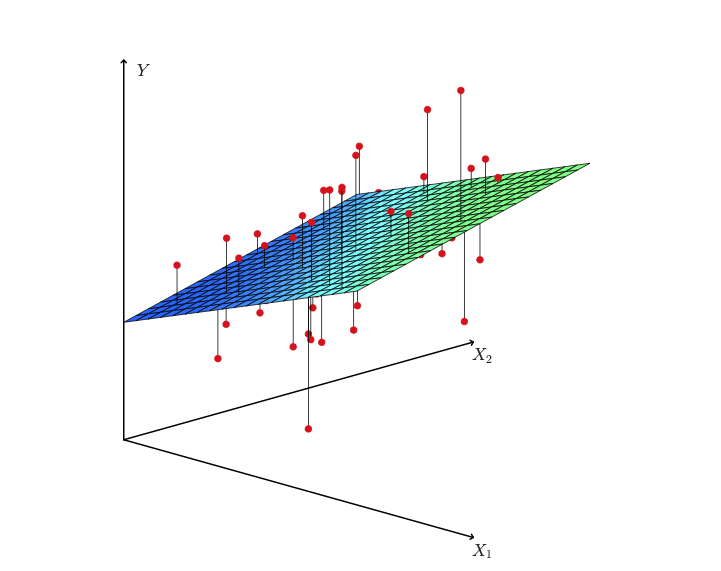 </center>

### Q4) Compute the (multiple) linear regression model with all three variables TV, Newspaper and Radio as predictors and Sales as the response.

In [ ]:
# Your code here


### Q5) Compute the Standard Error, $t$-statistic and $p$-value 

In [ ]:
# Your code here


### Compare your results with the results from the textbook (next slide)

### <center> $\color{maroon}{\text{Results for the advertising data}}$ </center>

$$~$$

| $$~$$                                | $$\textbf{Coefficient}$$ | $$\textbf{Std. Error}$$ | $$\textbf{t-statistic}$$ | $$\textbf{p-value}$$    |
| :----------------------------------: | :----------------------: | :---------------------: | :-------------------------------: | :---------------------: |
| $$\text{Intercept}$$                 |  $$2.939$$               | $$0.3119$$              | $$9.42$$                          | $$< 0.0001$$            |
| $$\color{maroon}{\text{TV}}$$        |  $$0.046$$               | $$0.0014$$              | $$32.81$$                          | $$< 0.0001$$            |
| $$\color{maroon}{\text{radio}}$$     |  $$0.189$$               | $$0.0086$$              | $$21.89$$                          | $$< 0.0001$$            | 
| $$\color{maroon}{\text{newspaper}}$$ | $$-0.001$$               | $$0.0059$$              | $$-0.18$$                          | $$0.8599$$              |

$~$
 <center>  $\text{Correlations}$ : </center> 

| $$~$$                                | $$\color{maroon}{\text{TV}}$$ | $$\color{maroon}{\text{radio}}$$| $$\color{maroon}{\text{newspaper}}$$ | $$\color{maroon}{\text{sales}}$$ |
| :--------------------------------:   | :---------------------------: | :-----------------------------: | :-----------------------------------------:  | :------------------------------: |
| $$\color{maroon}{\text{TV}}$$        |  $$1.0000$$                   | $$0.0548$$                      | $$ 0.0567 $$                            |  $$0.7822$$                      |
| $$\color{maroon}{\text{radio}}$$     |  $$~$$                        |   $$1.0000$$                    |  $$ 0.3541$$                             | $$0.5762$$                       |
| $$\color{maroon}{\text{newspaper}}$$ |  $$~$$                        |   $$~$$                         |  $$1.0000$$                          |  $$0.2283$$                      |
| $$\color{maroon}{\text{sales}}$$     |  $$~$$                        |   $$~$$                         |  $$~$$                                        |  $$1.0000$$                      |


### <center> $\color{maroon}{\text{Some important questions}}$ </center>


1.   Is at least one of the predictors X1, X2, . . . , Xp   useful in predicting the response ?

2.   Do all the predictors help to explain Y , or is only a subset of the predictors useful?

3. How well does the model fit the data ?

4. Given a set of predictor values, what response value should we predict, and how accurate is our prediction ?









### <center> $\color{maroon}{\text{Is at least one predictor useful ?}}$ </center>

 For the first question, we can use the F-statistic

$$ F = \frac{(\text{TSS} - \text{RSS})/p}{\text{RSS}/(n-p-1)} \sim F_{p,n-p-1}$$

$$~$$



### Compute the RSE, $R^2$ and F-statistic

### Compare your results with the results from the textbook (next slide)


| $$\textbf{Quantity}$$              | $$\textbf{Value}$$ |
| :-------------------------------:  | :----------------: |
| $$\text{Residual Standard Error}$$ | $$1.69$$           |     
| $$\text{R}^2$$                     | $$0.897$$          |  
| $$\text{F-statistic}$$             | $$570$$            |

### Q6. Repeat Q4 without using scikit.learn, i.e., use the least squares estimate that we derived in class using matrix algebra to compute the coefficients and see whether you get identical results